## Machine Learning : Theory and Applications (2025/26)
Simona Cocco & Vito Dichio

[✉ simona.cocco@phys.ens.fr](mailto:simona.cocco@phys.ens.fr) \\
[✉ vito.dichio@phys.ens.fr](mailto:vito.dichio@phys.ens.fr)


#### Bibliography:
[1] Cocco et al., *From Statistical Physics to Data-Driven Modelling: with Applications to Quantitative Biology*, Oxford University Press (2022)

[2] de Ruyter van Steveninck et al., *Reproducibility and Variability in Neural Spike Trains*, Science 275, 1805–1808 (1997)

[3] Koch et al., *Efficiency of Information Transmission by Retinal Ganglion Cells*, Current Biology 14, 1523–1530 (2004)

[4] Schneidman et al., *Weak pairwise correlations imply strongly correlated network states in a neural population*, Nature 440, 7087 (2006)

[5] Cover & Thomas, *Elements of information theory*. John Wiley & Sons (1999)


# ML for Neuroscience — Tutorial 2 (START)

**Topic:** Entropy and information in neural spike trains

**Goals**
- Define and compute entropy for discrete distributions (in bits)
- Bin spike trains and encode responses as binary words
- Estimate *total entropy* and *noise entropy* and mutual information 

**Note** / The present notebook is based on the *Tutorial 2: entropy and information in neural spike trains* in [1], Section 2.4. An additional general reference for the mathematical background is also [5], Chapter 2.

In [4]:
### Setup
# Import the necessary packages
import matplotlib.pyplot as plt
import numpy as np 
import scipy

# Set a seed for reproducibility
SEED = 888
rng = np.random.default_rng(SEED)

## Part A - Entropy of a Poisson spike train

Consider a single neuron whose spikes follow a Poisson process with constant rate $\theta$.  Let $N$ be the random variable denoting the number of spikes observed in a time window of length $T$.  Then $N$ is Poisson-distributed (see Tutorial 1):

$$
P_N(n \mid \lambda) = \Pr[N = n \mid \lambda]
= \frac{\lambda^n e^{-\lambda}}{n!}, \quad n=0,1,2,\dots
$$

where $\lambda = \theta T$ is the **expected number of spikes** in the window.

To analyze the spike train in a way that connects to information-theoretic quantities, we discretize the continuous time axis into non-overlapping bins of length $\Delta t$.

#### 🎯 Question A1.

Let $\sigma \in \{0,1\}$ be the binary random variable defined for each bin of length $\Delta t$ as follows: $\sigma=0$ if there are no spikes in the bin, $\sigma=1$ if there is **at least** one spike. This coarse-graining reduces the spike train to a binary sequence, which we can now analyze in terms of information content.

Compute analytically:

(i) the probability distribution $P_\sigma$ as functions of $\theta$ and $\Delta t$. 

💡 **Hint:** Use the fact that $P_\sigma(1) = 1 - P_N(0 \mid \theta, \Delta t).$

(ii) the entropy $S(P_{\sigma})$ of the binary distribution $P_{\sigma}$ and the entropy rate $S(P_{\sigma})/\Delta t$ (in bits per second)

#### (i) 

- We have $P_\sigma(\sigma = 0) = P_N(n=0)$

    We can evaluate the expression of $P_N(n \mid \lambda )$ given above at $n=0$:

    $P_N(n=0 \mid \lambda) = \frac{\lambda^0 e^{-\lambda}}{0!} = e^{- lambda}$

    Therefore, $P_\sigma(\sigma = 0 \mid \lambda) = e^{-\lambda}$.

- Moreover, we can use $P_\sigma(1) = 1 - P_N(0 \mid \theta, \Delta t)$. 

    Therefore, $P_\sigma(\sigma = 1 \mid \lambda) = 1 - e^{-\lambda}$.

#### (ii)

We have that $S[\sigma] = - \sum_{\sigma=\{0,1\}} P_\sigma(\sigma)logP_\sigma(\sigma)$

Sibce $\sigma$ can only be equal to 0 or 1, this gives us the following sum of two terms: $S[\sigma] = - P_{\sigma}(\sigma=0)log P_\sigma(\sigma=0)- P_{\sigma}(\sigma=1)log P_\sigma (\sigma = 1)$

By substituing with the expressions found above, we have:

$S[\sigma] = - e^{-\lambda}log(e^{-\lambda}) - (1 - e^{-\lambda})log(1 - e^{-\lambda})$
$\Rightarrow S[\sigma] = \lambda e^{-\lambda} + (e^{-\lambda} - 1)log(1 - e^{-\lambda})$



#### 🎯 Question A2.
Plot the entropy and entropy rate as functions of $\Delta t$, for $\theta = 2$ Hz, $4$ Hz, $8$ Hz.


💡 **Hint:** Use of `scipy.special.xlogy(x, x)` to safely compute xlog(x) ensuring the correct handling of the case x=0, see [Scipy documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.xlogy.html).

C:\Users\Bruna\AppData\Local\Temp\ipykernel_10656\493663343.py:12: RuntimeWarning: invalid value encountered in divide
  S_rate = entropy_sigma(dt, theta)/dt


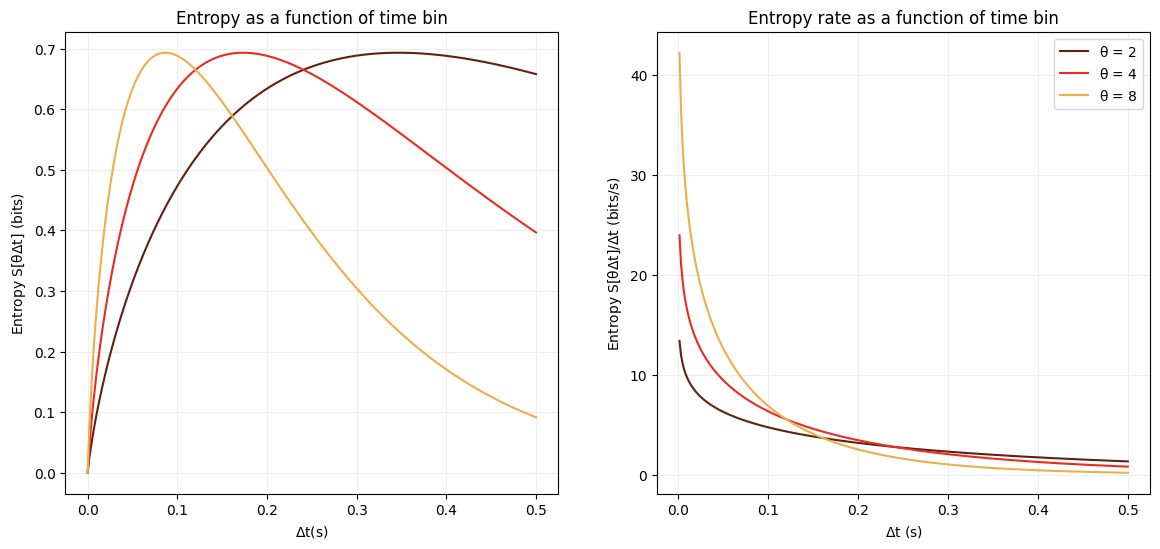

In [36]:
# Define function to compute the entropy according to the expression we derived above
def entropy_sigma(dt, theta):
    # Initialize the array
    S = np.zeros_like(dt)
    # Iterate over dt array
    for i, dt_temp in enumerate(dt):
        lam = dt_temp * theta
        S[i] = lam*np.exp(-lam) - scipy.special.xlogy((1 - np.exp(-lam)), (1 - np.exp(-lam)))
    return S

def entropy_rate(dt,theta):
    S_rate = entropy_sigma(dt, theta)/dt
    return S_rate

def plot_entropy(theta_vals, dt_array):
    # Plot
    color_palette = ["#61210f", "#ea2b1f", "#edae49"]
    plt.figure(figsize=(14,6))

    
    
    for i, theta_temp in enumerate(theta_vals):
        # Compute entropy and entropy rate
        S = entropy_sigma(dt_array, theta_temp)
        S_rate = entropy_rate(dt_array, theta_temp)

        #Entropy plot
        plt.subplot(1,2,1)
        plt.xlabel("$\Delta t (s)$")
        plt.ylabel("Entropy S[$\\theta \Delta t$] (bits)")
        plt.title("Entropy as a function of time bin")
        plt.grid(color="#F2EDED")
        plt.plot(dt_array, S, label=f"$\\theta$ = {theta_temp}", color=color_palette[i])

        # Entropy rate plot
        plt.subplot(1,2,2)
        plt.xlabel("$\Delta t$ (s)")
        plt.ylabel("Entropy S[$\\theta \Delta t$]/$\Delta t$ (bits/s)")
        plt.title("Entropy rate as a function of time bin")
        plt.grid(color="#F2EDED")
        plt.plot(dt_array, S_rate, label=f"$\\theta$ = {theta_temp}", color=color_palette[i])
    # Label axes and add title/legend 

    plt.legend()
   
    plt.show()

        

# Set array of dt and values of theta
theta_vals = np.array([2, 4, 8])
dt_array = np.linspace(0, 0.5, 300)

plot_entropy(theta_vals, dt_array)

---

## Part B - Entropy and information in experimental spike trains

We now move from the Poisson model to **real data**: the spiking activity of $L=40$ retinal ganglion cells, recorded during repeated presentations of a
natural movie stimulus [4].  This is the same dataset used in *Tutorial 1, Part B*. You can load it directly from the file `data/dati2-berry.dat` using:


In [73]:
import numpy as np

# Number of neurons and stimulus repetitions
N_neurons = 40
N_rep  = 120
T_stim  = 26.5   # duration (s) of one stimulus repetition
T_total = T_stim * N_rep # total recording time

def load_spike_data(path='data/dati2-berry.dat'):
    """
    Load and parse spike-train data from Schneidman et al. (2006).
    Each block in the file starts with a marker (4000), followed by
    the neuron ID, then the spike times (s).

    Returns
    -------
    datas : list of np.ndarray
        Spike times for each neuron (length L_neurons).
    """
    raw = np.loadtxt(path)
    chunks = np.split(raw, np.where(raw == 4000)[0][1:])
    data = [chunk[2:] for chunk in chunks]  # drop marker + neuron ID
    return data

# Load spike trains
data = load_spike_data()
print(f"Loaded {len(data)} neurons, total duration {T_total:.1f}s")

Loaded 40 neurons, total duration 3180.0s


#### 🎯 Question B1. 
Discretize the spike train of each neuron into bins of length $\Delta t = 0.01\ \mathrm{s}$. Define a binary variable $\sigma \in \{0,1\}$ for each time bin, with $\sigma=1$ if at least one spike occurs, and $\sigma=0$ otherwise. The result should be a binary array `data_bin` of shape
$(N_{\text{neurons}},\, N_{\text{bins}})$, where $N_{\text{bins}} = N_{\text{rep}} T_{\text{stim}} / \Delta t$.

💡 **Hint:** 
Given a spike time `t`, the spike time-bin index can be found by `(t/dt).astype(int)`.


In [75]:
def discretize_spike_train(data, dt):
    N_neurons = len(data)
    N_bins = int(T_total/dt)
    # neuron_data is the data of spike times for one single neuron
    data_bin = np.zeros((N_neurons, N_bins))
    for idx, neuron_data in enumerate(data):
        # Given a spike time t, the spike time-bin index can be found by (t/dt).astype(int)
        spike_bins = (neuron_data/dt).astype(int)
        #spike_bins = np.clip(spike_bins, 0, N_bins-1)  # avoid out-of-bounds
        data_bin[idx, spike_bins] = 1

    return data_bin

# Define the time bin
dt = 0.01 # in sec

data_bin = discretize_spike_train(data, dt)

In [79]:
print(np.shape(data_bin)) # N_neurons, N_bins

(40, 318000)


### Word-based encoding

To quantify **reproducibility** and **information content** of neural responses, we need to move beyond single spikes or bins.   Instead, we represent the spike train as a sequence of **binary words**, which capture temporal patterns of activity over short time windows.  This approach allows us to compare not just firing rates, but the *structure* and *variability* of neural responses across repeated stimulus presentations.

Concretely, we split the spike train into non-overlapping binary words, whose associated random variable is $W$, each spanning a time window of length $L_W$ seconds and therefore extending over $l_W = L_W/\Delta t$ consecutive time bins. Let us call $\mathcal{W}$ the space of all possible binary words of length $l_W$. The number of possible words is: $N_{\mathrm{W}} = 2^{l_{W}}$.


**Example**. consider the following spike train, where each bin corresponds to $\Delta t = 0.01\ \mathrm{s}$:

[0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,(...)]

This can be split into words of length $L_W = 0.1\ \mathrm{s}$ (i.e. $l_W=10$ bins):

  - word 1: [0,1,1,1,0,0,1,0,1,0]
  - word 2: [0,0,0,1,0,1,0,1,0,1]
  - word 3: [0,1,0,1,0,1,0,1,0,1]
  - (...)

There are $N_W= 2^{l_W} = 2^{10} = 1024$ possible binary words of length $l_W$.

Given a spike train, we can estimate:
- The **total distribution** $P(W)$, i.e., relative frequency of each word across the full recording.
- The corresponding **total entropy**:
  $$
  S_{\mathrm{total}} \equiv S(W) = -\sum_{w\in\mathcal{W}} P(w) \log_2 P(w) \quad \text{bits}.
  $$

#### 🎯 Question B2. 
For the first neuron, compute and print the total entropy $S_{\mathrm{total}}$ for $L_W = 0.1\ \mathrm{s}$ and $\Delta t = 0.01\ \mathrm{s}$.

##### 💡 Hint for Question B2

Code a function `compute_total_entropy` which computes the total entropy of **a single spike train** (one neuron) by applying the following algorithm:

1. **Split into words**.
   Cut the (binned) spike train into consecutive, **non-overlapping** blocks of length `l_W` (bins).
   Each block is one binary word.
   *(Use the provided `split_nonoverlapping_words`.)*
2. **Map words to integers**.
   Convert each binary word to an integer in `[0, 2**l_W - 1]`, this will be the word ID.
   *(Use the provided `bits_to_int`)*
3. **Build empirical distribution**.
   Count occurrences of each word ID and normalize to obtain the probability vector
   $P(W)$ of length `2**l_W`.
   One possible choice is to use `np.bincount` with `minlength=2**l_W`, then divide by the total number of occurrences, see [Numpy documentation](https://numpy.org/doc/2.1/reference/generated/numpy.bincount.html))
4. **Compute entropy**.

In [77]:
# Helper functions

def split_nonoverlapping_words(spike_train, l_W):
    """
    Split a 1D binary sequence (spike train for a single neuron) into consecutive **non-overlapping** words of length l_W.
    Truncates any trailing incomplete block.
    Returns: (n_words x l_W) array of 0/1.
    """

    # Compute the length to truncate so only full words are kept
    n_words = (len(spike_train) // l_W) * l_W
    # Truncate the spike train to a multiple of l_W
    row = spike_train[:n_words]

    # Reshape into (n_words, l_W)
    return row.reshape(-1, l_W)


def bits_to_int(words, l_W):
    """
    Convert an array of binary words (shape: n_words x l_W) into integers in [0, 2^l_W) - l_W is the legth (in bins) of the words.
    Vectorized: uses bit weights instead of strings.
    """

    # Create an array of bit weights: [2^(word_bins-1), ..., 2^0]
    weights = np.power(2, np.arange(l_W-1, -1, -1))

    # Compute the integer value for each word by dot product with weights.
    # For each row: sum(word[i] * weights[i]) over all bits.
    return (words @ weights).astype(int)

In [96]:
# Set parameters - window of length and time bin
L_w = 0.1 # in seconds
dt = 0.01 # in seconds

# Compute word length or number of bins
l_w = int(L_w//dt)

data_split_words = split_nonoverlapping_words(data_bin, l_w)
data_words_id = bits_to_int(data_split_words, l_w)

occurences_id = np.bincount(data_words_id, minlength=2**l_w)
prob = occurences_id/np.sum(occurences_id)

S = - np.sum(scipy.special.xlogy(prob, prob)) / np.log(2) # divide by log 2 to convert to base 2 (in bits)

In [98]:
S # problem : correct

np.float64(0.8954897214622082)

### Noise entropy and information

To assess how reproducible the neural responses are across repeated presentations of the same stimulus, we align trials and examine the distribution of words at each **word bin** - that is, each segment of the stimulus cycle of duration $L_W$ seconds, corresponding to a word of length $l_W$ time bins.

- If the neuron responds deterministically, the same word appears at each word bin on every trial.
- If responses vary across trials, the distribution of words at a given word bin broadens, reflecting noise in the response.

This motivates the definition of the **noise entropy**: the average uncertainty (entropy) of the word distribution when the word bin is fixed. Informally, it is the variability that does not come from that the variation of the stimulus.


Formally, let $B$ be the random variable denoting the **word bin** within a stimulus cycle. Here, each word bin corresponds to a specific stimulus, that is a specific moment of the replayed movie. $B$ takes values $b\in\mathcal{B}=\{0, 1, \ldots, N_B-1\}$, where $N_B = T_{\text{stim}}/L_W$ is the number of words that fit in one stimulus repetition. Since all word bins are equally likely, $P(B=b) = 1/N_B$. The conditional entropy of words given the word bin is defined as follows

  $$
    S(W\mid B) \equiv \sum_{b\in\mathcal{B}} p(b) S(W\mid B=b) = -\frac{1}{N_B} \sum_{b\in\mathcal{B}} \sum_{w\in\mathcal{W}} P(w \mid b)\,\log_2 P(w \mid b).
  $$

Here, $P(w\mid b)$ is the empirical distribution of words at word bin $b$ across stimulus repeats. This latter entropy is also called **noise entropy** $S_{\text{noise}}$ since it reflects the non-deterministic response to the stimulus.

- If responses are perfectly reproducible, each $P(w \mid b)$ is a delta distribution, so $S_{\text{noise}}=0$.
- Larger $S_{\text{noise}}$ means more variability across trials, i.e. less reproducibility.

The **mutual information** between the stimulus (represented by the word bin $B$) and the response (the word $W$) is defined as:

$$
I(W; B) \equiv S(W) - S(W \mid B)
$$

Thus, the **information** carried by the spike train about the stimulus is estimated as:

$$
I = S_{\text{total}} - S_{\text{noise}} \quad \text{(bits)}.
$$

- If \(I = 0\), the neural response carries no information about the stimulus (responses are independent of stimulus timing).
- Larger \(I\) indicates that spike patterns are more reproducible and stimulus-locked, hence more informative about the stimulus.

#### 🎯 Question B3. 
Compute the noise entropy $S_{\text{noise}}$ and information $I$ for the first neuron, using $L_W = 0.1\ \mathrm{s}$ and $\Delta t = 0.01\ \mathrm{s}$.

##### 💡 Hint for Question B3.
Implement `compute_noise_entropy` for a single spike train:

1. **Reshape trials** to shape $(N_{\text{rep}},\, N_{\text{bins per stim}})$, one row per repetition.
2. **Split each repetition into words** (length $l_W$) and map to integer IDs as done before (use the helpers).
3. **Group by word bin** $b$: at each position in the stimulus cycle, collect words across repetitions.
4. **Compute entropy** at each $b$: estimate $P(W\mid B=b)$ and its entropy (bits).
5. **Average** across bins to obtain $S_{\text{noise}}$.

#### 🎯 Question B4. 
Generalise the previous computations to all neurons and print the results in a table. Plot these three quantities ($S_{\text{total}}$, $S_{\text{noise}}$, $I$) as functions of the spiking frequency of each neuron. Compare to the total entropy rate of this process with the one of the binary process from Part A, briefly discuss why the entropy rate is the relevant quantity for comparison.

##### 💡 Hint for Question B4.
Use the functions `compute_total_entropy(spike_train, ...)` (from B.2) and `compute_noise_entropy(spike_train, ...)` (from B.3) and apply them to **all neurons at once** by using `np.apply_along_axis`. See the [NumPy documentation](https://numpy.org/doc/stable/reference/generated/numpy.apply_along_axis.html) for details.

#### 🎯 Question B5. 
For the first neuron, compute the **noise entropy** $S_{\mathrm{noise}}(b)$ **for each word bin** $b$ within the stimulus cycle (without averaging across bins).  

Plot these entropy values as a function of the **average firing rate** in each bin. On the same figure, overlay the theoretical prediction for a Poisson process with the same (word) bin rates, computed over $l_W$ time bins, namely $l_W \, S(P_{\sigma})$, where $S(P_{\sigma})$ is the binary entropy introduced in Part A1.

**Discussion:** Comment on how the measured noise entropy compares to the Poisson prediction: what does this tell us about the structure of the neural responses relative to a homogeneous Poisson model? 


##### 💡 Hint for Question B5.
In order to compute the average firing rate in each bin, start from the raw spike times, then apply `np.unique` to `(spike_times % T_stim) // L_W`, see [Numpy documentation](https://numpy.org/devdocs/reference/generated/numpy.unique.html).


#### 🎯 Question B6 (Optional). 
Investigate how the estimated information $I$ depends on two key parameters:

1. The number of stimulus repetitions $N_{\text{rep}}$.
2. The word duration $L_W$ (in seconds).

For the first neuron:
- Compute the information $I$ as a function of $N_{\text{rep}}$ and $L_W$.
- Express the result both as **bits per word** and as **bits per second**.
- Examine whether the information per second converges as $N_{\text{rep}}$ and $L_W$ increase.

**Discussion:** Are the available data $(N_{\text{rep}}=120$ and word size $L_W = 0.1\,\mathrm{s}$) sufficient to obtain a reliable estimate of the information rate?